<font color="blue" size=5><b>Bagging Ensemble</b></font>

In [1]:
import numpy as np
import pandas as pd

In [2]:
from sklearn.datasets import load_iris
iris = load_iris()
df = pd.DataFrame(data=iris.data, columns=iris.feature_names)
df['species'] = iris.target



In [3]:
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [4]:
df.sample(10)

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),species
40,5.0,3.5,1.3,0.3,0
33,5.5,4.2,1.4,0.2,0
55,5.7,2.8,4.5,1.3,1
13,4.3,3.0,1.1,0.1,0
66,5.6,3.0,4.5,1.5,1
142,5.8,2.7,5.1,1.9,2
58,6.6,2.9,4.6,1.3,1
18,5.7,3.8,1.7,0.3,0
114,5.8,2.8,5.1,2.4,2
39,5.1,3.4,1.5,0.2,0


In [6]:
# converting into a binary problem
df = df[df['species'] != 0][['sepal width (cm)','petal length (cm)','species']]

In [ ]:
df.head()

,SepalWidthCm,PetalLengthCm,Species
50,3.2,4.7,1
51,3.2,4.5,1
52,3.1,4.9,1
53,2.3,4.0,1
54,2.8,4.6,1


In [7]:
import seaborn as sns
import matplotlib.pyplot as plt

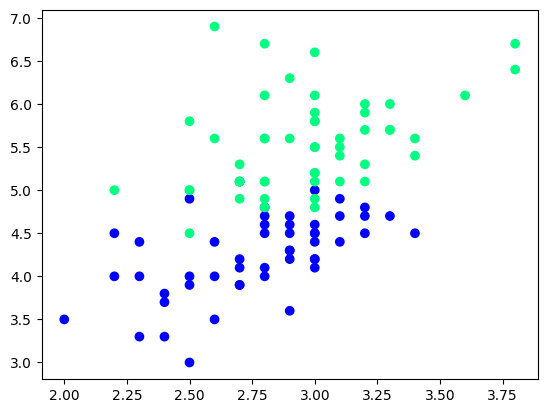

In [8]:
plt.scatter(df['sepal width (cm)'],df['petal length (cm)'],c=df['species'],cmap='winter')

In [9]:
df_train = df.iloc[:60,:].sample(10)
df_train

,sepal width (cm),petal length (cm),species
98,2.5,3.0,1
96,2.9,4.2,1
62,2.2,4.0,1
60,2.0,3.5,1
74,2.9,4.3,1
100,3.3,6.0,2
84,3.0,4.5,1
59,2.7,3.9,1
104,3.0,5.8,2
79,2.6,3.5,1


In [10]:
# Taking only 10 rows for training
df = df.sample(100)
df_train = df.iloc[:60,:].sample(10)
df_val = df.iloc[60:80,:].sample(5)
df_test = df.iloc[80:,:].sample(5)

In [11]:
df_train

,sepal width (cm),petal length (cm),species
56,3.3,4.7,1
91,3.0,4.6,1
137,3.1,5.5,2
63,2.9,4.7,1
120,3.2,5.7,2
88,3.0,4.1,1
141,3.1,5.1,2
101,2.7,5.1,2
117,3.8,6.7,2
97,2.9,4.3,1


In [12]:
df_val

,sepal width (cm),petal length (cm),species
145,3.0,5.2,2
96,2.9,4.2,1
53,2.3,4.0,1
129,3.0,5.8,2
73,2.8,4.7,1


In [13]:
df_test

,sepal width (cm),petal length (cm),species
144,3.3,5.7,2
100,3.3,6.0,2
59,2.7,3.9,1
114,2.8,5.1,2
127,3.0,4.9,2


In [14]:
X_test = df_val.iloc[:,0:2].values
y_test = df_val.iloc[:,-1].values

In [15]:
y_test

array([2, 1, 1, 2, 1])

<font color="red" size=3><b>Bagging</b></font>

In [16]:
# Data for Tree 1
df_bag = df_train.sample(8,replace=True)

X = df_bag.iloc[:,0:2]
y = df_bag.iloc[:,-1]

df_bag

,sepal width (cm),petal length (cm),species
97,2.9,4.3,1
120,3.2,5.7,2
141,3.1,5.1,2
91,3.0,4.6,1
120,3.2,5.7,2
117,3.8,6.7,2
91,3.0,4.6,1
137,3.1,5.5,2


In [17]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import plot_tree
from mlxtend.plotting import plot_decision_regions
from sklearn.metrics import accuracy_score

In [18]:
dt_bag1 = DecisionTreeClassifier()

In [22]:
def evaluate(clf,X,y):
    clf.fit(X,y)
    plot_tree(clf)
    plt.show()
    plot_decision_regions(X.values, y.values, clf=clf, legend=2)
    y_pred = clf.predict(X_test)
    print(accuracy_score(y_test,y_pred))

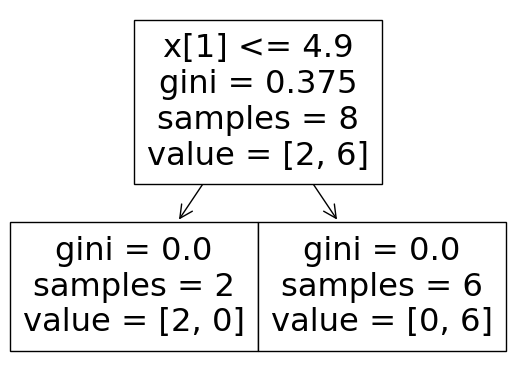

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:465: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:465: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


1.0


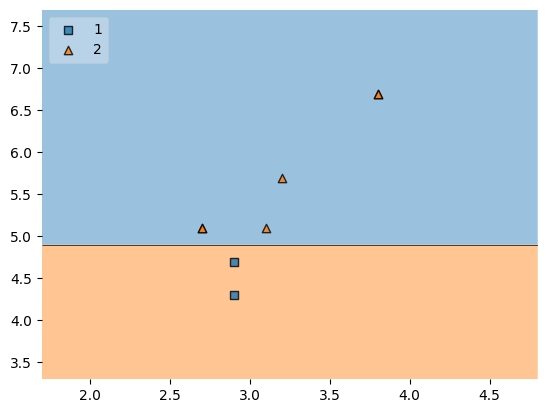

In [23]:
evaluate(dt_bag1,X,y)

In [24]:
# Data for Tree 1
df_bag = df_train.sample(8,replace=True)

# Fetch X and y
X = df_bag.iloc[:,0:2]
y = df_bag.iloc[:,-1]

# print df_bag
df_bag

,sepal width (cm),petal length (cm),species
137,3.1,5.5,2
141,3.1,5.1,2
141,3.1,5.1,2
137,3.1,5.5,2
63,2.9,4.7,1
141,3.1,5.1,2
56,3.3,4.7,1
101,2.7,5.1,2


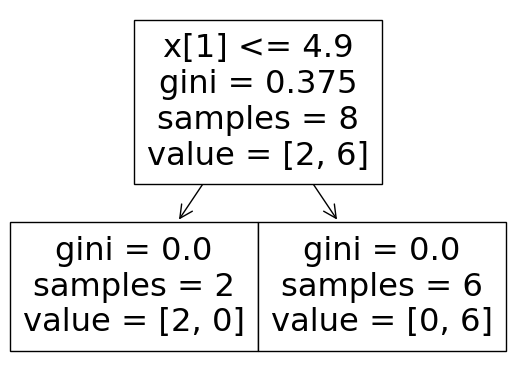

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:465: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:465: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


1.0


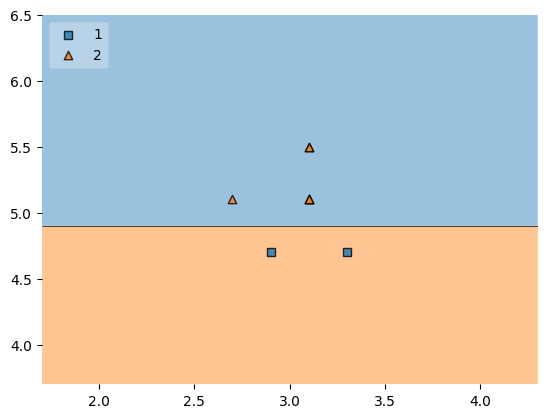

In [25]:
dt_bag2 = DecisionTreeClassifier()
evaluate(dt_bag2,X,y)

In [26]:
# Data for Tree 1
df_bag = df_train.sample(8,replace=True)

# Fetch X and y
X = df_bag.iloc[:,0:2]
y = df_bag.iloc[:,-1]

# print df_bag
df_bag

,sepal width (cm),petal length (cm),species
63,2.9,4.7,1
88,3.0,4.1,1
137,3.1,5.5,2
91,3.0,4.6,1
117,3.8,6.7,2
97,2.9,4.3,1
97,2.9,4.3,1
137,3.1,5.5,2


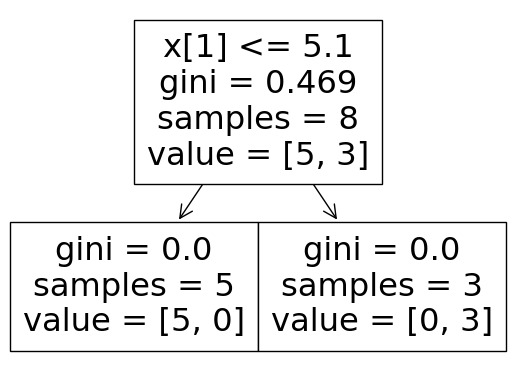

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:465: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:465: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


1.0


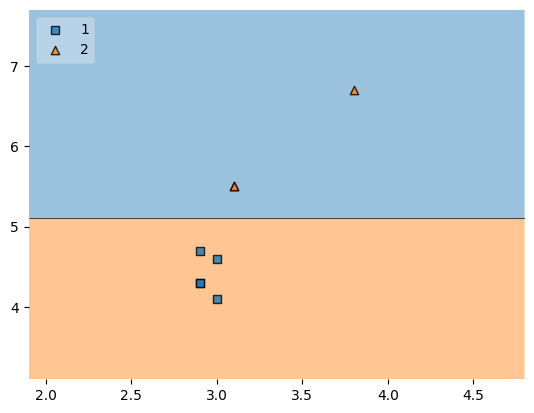

In [27]:
dt_bag3 = DecisionTreeClassifier()
evaluate(dt_bag3,X,y)